# Graph and Trees

## Trees

### 1. Binary Tree Node

In [ ]:
class TreeNode:
    def __init__(self, data):
        self.val = data
        self.left = None
        self.right = None

# creating nodes
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)


### 2. Preorder Traversal (Root → Left → Right)

In [ ]:
def preorder(root):
    if not root:
        return
    print(root.val, end=" ")
    preorder(root.left)
    preorder(root.right)

# Output: 1 2 4 5 3
preorder(root)


1 2 4 5 3 

### 3. Inorder Traversal (Left → Root → Right)

In [ ]:
def inorder(root):
    if not root:
        return
    inorder(root.left)
    print(root.val, end=" ")
    inorder(root.right)

# Output: 4 2 5 1 3
inorder(root)

4 2 5 1 3 

### 4. Postorder Traversal (Left → Right → Root)

In [ ]:
def postorder(root):
    if not root:
        return
    postorder(root.left)
    postorder(root.right)
    print(root.val, end=" ")

# Output: 4 5 2 3 1
postorder(root)

4 5 2 3 1 

### 5. level order traversal

In [ ]:
from collections import deque

def level_order_with_level(root):
    if not root:
        return

    q = deque([root])
    level = 0

    while q:
        size = len(q)  # number of nodes at current level

        for _ in range(size):
            node = q.popleft()
            print(f"Node: {node.val}, Level: {level}")

            if node.left:
                q.append(node.left)
            if node.right:
                q.append(node.right)

        level += 1

level_order_with_level(root)

Node: 1, Level: 0
Node: 2, Level: 1
Node: 3, Level: 1
Node: 4, Level: 2
Node: 5, Level: 2


### 6. Leetcode-2096. Step-By-Step Directions From a Binary Tree Node to Another

In [ ]:
def getDirections(root, src: int, dest: int) -> str:

  def find_path(node, target_val: int, path_so_far: list):
    if not node:
      return False

    if node.val == target_val:
      return True

    if find_path(node.left, target_val, path_so_far):
      path_so_far.append("L")
      return True

    elif find_path(node.right, target_val, path_so_far):
      path_so_far.append("R")
      return True

    return False

  root_to_src = []
  root_to_dest = []

  find_path(root, src, root_to_src)
  find_path(root, dest, root_to_dest)

  # Paths are built from node to root, so reverse them to get root to node
  root_to_src.reverse()
  root_to_dest.reverse()

  # Find the Lowest Common Ancestor (LCA) by comparing paths
  i = 0
  while i < len(root_to_src) and i < len(root_to_dest) and root_to_src[i] == root_to_dest[i]:
    i += 1

  # Path from src to LCA is 'U' for each step from LCA to src
  path_from_src_to_lca = "U" * (len(root_to_src) - i)

  # Path from LCA to dest is the remaining part of root_to_dest
  path_from_lca_to_dest = "".join(root_to_dest[i:])

  return path_from_src_to_lca + path_from_lca_to_dest

# Example usage (assuming TreeNode and root are defined in previous cells):
# src_node = 4
# dest_node = 3
# directions = getDirections(root, src_node, dest_node)
# print(f"Directions from {src_node} to {dest_node}: {directions}")

# src_node = 2
# dest_node = 3
# directions = getDirections(root, src_node, dest_node)
# print(f"Directions from {src_node} to {dest_node}: {directions}")

## Graphs

### Graph visualization

In [ ]:
import sys
!{sys.executable} -m pip install networkx matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to draw a graph
def draw_graph(graph, title, directed=False):
    if directed:
        G = nx.DiGraph(graph)
    else:
        G = nx.Graph(graph)
    pos = nx.spring_layout(G)  # positions for all nodes
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray', linewidths=1, font_size=10, arrowsize=20) # Added arrowsize for directed graphs
    plt.title(title)
    plt.show()

### 1. Graph repsentations

#### A. Adjaceny List

In [ ]:
from collections import defaultdict

graph = defaultdict(list)

edges = [(0,1), (0,2), (1,3), (2,3)]

for u, v in edges:
    # bidirection graph
    graph[u].append(v)
    graph[v].append(u)

print(dict(graph))


{0: [1, 2], 1: [0, 3], 2: [0, 3], 3: [1, 2]}


In [ ]:
## for Weighted
graph = defaultdict(list)

edges = [(0,1,5), (0,2,2), (1,3,4)]

for u, v, w in edges:
    # directed graph
    graph[u].append((v, w))


#### B. Adjaceny Matrix

In [ ]:
n = 4
matrix = [[0]*n for _ in range(n)]

edges = [(0,1), (0,2), (1,3), (2,3)]

for u, v in edges:
    matrix[u][v] = 1
    matrix[v][u] = 1  # remove for directed graph

for row in matrix:
    print(row)


[0, 1, 1, 0]
[1, 0, 0, 1]
[1, 0, 0, 1]
[0, 1, 1, 0]


### DFS

#### A. Recusion implemetation

In [ ]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()

    visited.add(start)
    print(start, end=" ")

    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)


#### B. Stack Implmentation

In [ ]:
def dfs_iterative(graph, start):
    visited = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)

            # reverse to maintain same order as recursive DFS
            for neighbor in reversed(graph[node]):
                if neighbor not in visited:
                    stack.append(neighbor)


### BFS Implementation

In [ ]:
from collections import deque

# only add to queue after marking it as visited
# (rm*wa* will add duplicate entries in the queue so don't use it. eg: 1->2,1->2,2->4,3->4 in this case 4 will be printed twice)

def bfs(graph, start):
    visited = set([start])
    queue = deque([start])

    while queue:
        node = queue.popleft() #it already marked visited as we are only adding in the queue after marking it visited
        print(node, end=" ")

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)     # mark visited here
                queue.append(neighbor)


In [ ]:
from collections import deque
# if we also want to print the distance from the start node
def bfs(graph, start):
    visited = set([start])
    queue = deque([(start, 0)])  # (node, distance)

    while queue:
        node, dist = queue.popleft()
        print(f"Node {node}, Distance from {start} = {dist}")

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, dist + 1))


### Path exist between two nodes?

In [ ]:
def path_exist_dfs(graph: dict, src: int, dest: int,visited:set=None) -> bool:
    if visited is None:
        visited = set()

    visited.add(src)
    if src==dest:
      return True

    # check if path exist between any neighbour of src to dest or not,if yes then path also exist between src and dest
    for neighbor in graph[src]:
        if neighbor not in visited:
            if path_exist_dfs(graph,neighbor,dest,visited):
              return True

    # if src!=dest and also no path exist between its neighbour and dest,then it means that no path exist between src and dest,return false
    return False



In [ ]:
# implementing same using bfs
from collections import deque

def path_exist_bfs(graph: dict, src: int, dest: int) -> bool:
    queue=deque([src])
    visited=set([src])

    while queue:
        node=queue.popleft()
        if node==dest:
            return True

        for neighbor in graph[node]:
          if neighbor not in visited:
            queue.append(neighbor)
            visited.add(neighbor)
    return False


### Print all paths from source to destination

In [ ]:
def print_all_paths(graph: dict, src: int, dest: int, visited: set, path_so_far: list):

    visited.add(src)
    path_so_far.append(src)

    if src == dest:
        print(path_so_far)
    else:
        for neighbor in graph[src]:
            if neighbor not in visited:
                print_all_paths(graph, neighbor, dest, visited, path_so_far)

    # backtrack
    path_so_far.pop()
    visited.remove(src)

# visited = set()
# print_all_paths(graph, src, dest, visited, [])


### Number of connected compononents

In [ ]:
def dfs(graph: dict, node: int, visited: set):

  visited.add(node)

  # explore all neighbours

  for neighbor in graph[node]:
    if neighbor not in visited:
      dfs(graph, neighbor, visited)

# Example usage:
# Assuming 'graph' is defined (e.g., from cell _mLX6rsGtjDs)
# and 'v' is the total number of nodes (e.g., v = 4 for the example graph)

graph = {0: [1, 2], 1: [0, 3], 2: [0, 3], 3: [1, 2]} # Example graph
v = 4 # Total number of nodes

visited = set()
ans = 0
for i in range(v):
  if i not in visited:
    dfs(graph, i, visited)
    ans += 1
print(f"Number of connected components: {ans}")


Number of connected components: 1


### Cycle detection in undirected graph

In undirected graph we have a-b means we have a->b and b->a also ,but we don't consider it as cycle

#### A. Using BFS

In [ ]:
from collections import deque

def has_cycle_bfs_undirected(graph):
    visited = set()

    for start in graph: # because there can be multiple componenets,we have to check in all
        if start in visited:
            continue

        queue = deque([(start, -1)])  # (node, parent)
        visited.add(start)

        while queue:
            node, parent = queue.popleft()

            for neighbor in graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, node))
                elif neighbor != parent: # this is the core logic: its neighbour should be visited and its neighbour should not be its parent
                 # (becuase 1-2 can also be cycle becuase for 2 1 is the neighbour and is visited )
                 # 1-2,2-3,1-3 in this case when we reach at 3,its two neighbours are 1 and 2. for 1 its not cycle becuase we are coming through this path only i.e its parent is 1
                    return True

    return False


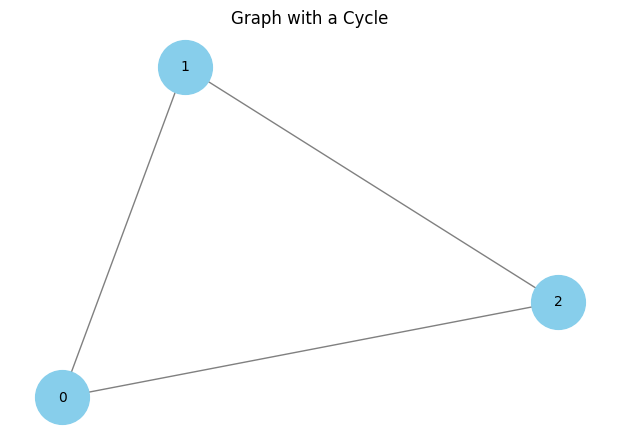

Graph with cycle: {0: [1, 2], 1: [0, 2], 2: [0, 1]}
Does graph_with_cycle have a cycle? True


In [ ]:


# Graph with a cycle
graph_with_cycle = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1]
}


# Visualize graph with cycle
draw_graph(graph_with_cycle, "Graph with a Cycle")


# Test the function on graph with cycle
print(f"Graph with cycle: {graph_with_cycle}")
print(f"Does graph_with_cycle have a cycle? {has_cycle_bfs_undirected(graph_with_cycle)}")




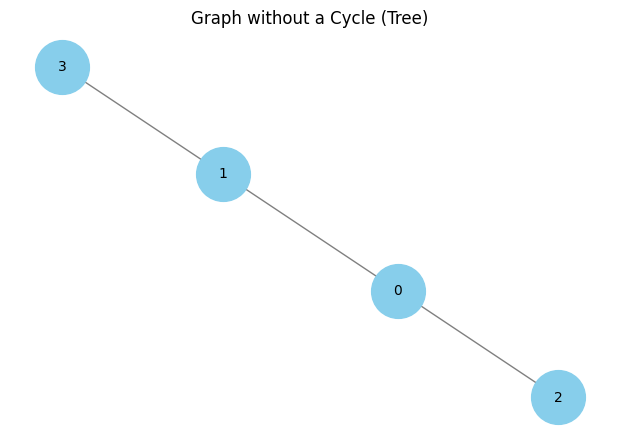


Graph without cycle: {0: [1, 2], 1: [0, 3], 2: [0], 3: [1]}
Does graph_without_cycle have a cycle? False


In [ ]:
graph_without_cycle = {
    0: [1, 2],
    1: [0, 3],
    2: [0],
    3: [1]
}


# Visualize graph without cycle
draw_graph(graph_without_cycle, "Graph without a Cycle (Tree)")
# Test the function on graph without cycle
print(f"\nGraph without cycle: {graph_without_cycle}")
print(f"Does graph_without_cycle have a cycle? {has_cycle_bfs_undirected(graph_without_cycle)}")

#### B. Using DFS

In [ ]:
def has_cycle_undirected(graph):
    visited = set()

    def dfs(node, parent):
        visited.add(node)

        for neighbor in graph[node]:
            if neighbor not in visited:
                if dfs(neighbor, node):
                    return True
            elif neighbor != parent:
                # visited and not parent → cycle
                return True

        return False

    # handle disconnected graph
    for node in graph:
        if node not in visited:
            if dfs(node, -1):
                return True

    return False


### Detect Cycle in Directed graph

We can't use the same method as for undirected becuase of below example

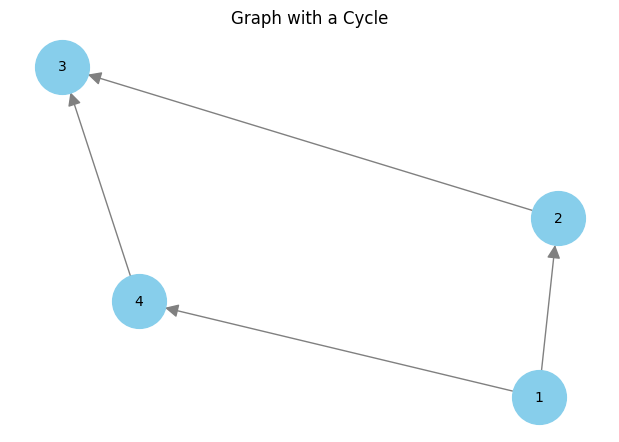

Graph with cycle: {1: [2, 4], 2: [3], 4: [3]}
Does graph_with_cycle have a cycle? True


In [ ]:


# Graph with a cycle
graph_with_cycle = {
    1: [2,4],
    2: [3],
    4: [3]
}


# Visualize graph with cycle
draw_graph(graph_with_cycle, "Graph with a Cycle",directed=True)


# Test the function on graph with cycle
print(f"Does graph_with_cycle have a cycle? {has_cycle_bfs_undirected(graph_with_cycle)}")




To solve this we need to keep two sets for visited.one for current path and one for global

#### 1. Using DFS

In [ ]:
def has_cycle_dfs(graph):
    visited = set()
    rec_stack = set()

    def dfs(node):
        visited.add(node)
        rec_stack.add(node)

        for nbr in graph.get(node, []):

            # Case 1:
            # nbr NOT visited AND NOT in recursion stack
            if (nbr not in visited) and (nbr not in rec_stack):
                if dfs(nbr):
                    return True

            # Case 2:
            # nbr visited AND IN recursion stack → cycle
            elif (nbr in visited) and (nbr in rec_stack):
                return True

            # Case 3:
            # nbr visited BUT NOT in recursion stack → safe
            elif (nbr in visited) and (nbr not in rec_stack):
                continue

            # Case 4:
            # nbr NOT visited BUT IN recursion stack → impossible
            elif (nbr not in visited) and (nbr in rec_stack):
                # logically impossible case
                continue

        # backtrack
        rec_stack.remove(node)
        return False

    # handle disconnected components
    for node in graph:
        if node not in visited:
            if dfs(node):
                return True

    return False


### 2. Using topological sort

A directed graph is acyclic iff we can do a topological sort of all nodes.

If some nodes are never processed, they belong to a cycle.

In [ ]:
from collections import deque, defaultdict

def has_cycle_bfs(graph):
    indegree = defaultdict(int)

    # calculate indegrees
    for u in graph:
        for v in graph[u]:
            indegree[v] += 1

    queue = deque()
    for node in graph:
        if indegree[node] == 0:
            queue.append(node)

    count = 0

    while queue:
        node = queue.popleft()
        count += 1

        for nbr in graph[node]:
            indegree[nbr] -= 1
            if indegree[nbr] == 0:
                queue.append(nbr)

    return count != len(graph)


### Is Graph bipartite?

A Graph is said to be bipartite if we can divide the vertices in two sets such  that all the edges are only from one set to second set. (no edges within a set)

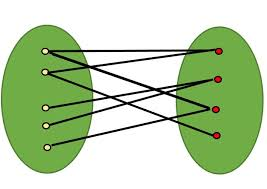

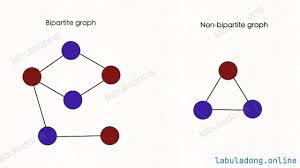

If a graph doesn't has any cycle,then it is bipartitie.

if graph has cycle:
  even length cycle-> bipartite,
  odd length cycle-> not bipartite

 **Intution**

Assign color 0 or 1

Start from a node → color = 0

All neighbors → color = 1

Their neighbors → color = 0

If you ever see an edge connecting same color → ❌ not bipartite

In [ ]:

from collections import deque

def is_bipartite(graph):
    color = {}  # node → 0 or 1

    for start in graph:
        if start not in color:
            queue = deque([start])
            color[start] = 0

            while queue:
                node = queue.popleft()

                for neighbor in graph[node]:
                    if neighbor not in color:
                        color[neighbor] = 1 - color[node]
                        queue.append(neighbor)
                    elif color[neighbor] == color[node]:
                        # same color neighbor → odd cycle
                        return False

    return True


### Dijstas Algorithm

Dijkstra’s algorithm finds the shortest path from a source node to all other nodes in a weighted graph where:

⚠️ All edge weights must be non-negative"

In [ ]:
import heapq

def dijkstra(graph: dict,src: int):
  # distance from src node
  dist={node:float('inf') for node in graph}
  # src to src distance is 0
  dist[src]=0
  #(distance,node) distance should be first becuase by default first value of tuple is used to calculate minimum
  pq=[(0,src)]

  while pq:
    dist,node=heapq.heapop(pq) # removing edge from pq

    if dist > dist[node]:
      continue

    for neighbour,distance in graph[node]:
      new_dist=dist+distance

      # relax
      if new_dist < dist[neighbour]:
        dist[neighbour]=new_dist
        heapq.heappush(pq,(new_dist,neighbour))  #adding node in pq

Time Complexity
Let:

V = number of vertices

E = number of edges

Using Min Heap (heapq)
Time: O((V + E) log V)


Why?
**bold text**
Each node is pushed into heap → V log V

Each edge relaxation → E log V

### Minimum Spanning Tree

In simple words

Given a connected, undirected, weighted graph, a minimum spanning tree is a way to connect all the vertices such that:

Every vertex is connected (no one is left out)

There are no cycles

The total sum of edge weights is minimum

#### A. Prism Algorithm

1. Start from **any node**
2. Mark it as **visited**
3. Push all its edges into a **min-heap (priority queue)**
4. Repeatedly:
   - Pop the **minimum weight edge**
   - If it connects to an **unvisited node**:
     - Add it to MST
     - Mark the node as visited
     - Push its edges into the heap
5. Stop when all vertices are visited


In [ ]:
import heapq

def prim_mst(graph, start=0):
    """
    graph: adjacency list
    graph[u] = [(v, weight), ...]
    """
    visited = set()
    min_heap = [(0, start)]  # (weight, node)
    mst_cost = 0

    while min_heap:
        weight, u = heapq.heappop(min_heap)

        if u in visited:
            continue

        visited.add(u)
        mst_cost += weight

        for v, w in graph[u]:
            if v not in visited:
                # not marking visited here becuase we want to explore all options
                heapq.heappush(min_heap, (w, v))

    return mst_cost


#### 🌳 Prim’s Algorithm — Complexity Analysis

### ⏱️ Time Complexity (TC)

Prim’s algorithm performance depends on **how it is implemented**.

#### 1️⃣ Using **Min Heap (Priority Queue)** ✅ *(most common)*

- Each edge can be pushed into the heap **at most once**
- Heap operations (`push` / `pop`) take **O(log V)** time

👉 **Time Complexity:**  

O(Elog V)

Where:
- `V` = number of vertices
- `E` = number of edges


### Topological Sort

**Topological Sort** is a linear ordering of vertices in a **Directed Acyclic Graph (DAG)** such that for every directed edge  
`u → v`, vertex `u` appears **before** vertex `v` in the ordering.

### Key Points
- Applicable **only to DAGs**
- Ordering may **not be unique**
- Used for **dependency resolution** (tasks, courses, builds)


#### 1. Using Kahns algorithm

In [ ]:
# first compute the indegree of all
# start bfs with pq with initial nodes as the node with indegree==0 becuase we can't reach to them through other nodes so they have to come first in the order.
# do bfs and start deacreasing the indegree of the neighbours by 1 while bfs and if indegree of neighbors become 0 then add it to queue.

from collections import deque

def top_sort(graph):

  # calculate indegree
  indegree={node:0 for node in graph} # O(V) TC

  for node in graph:
    for neighbours in graph[node]:
      indegree[node]+=1

  q=deque()

  #insert all nodes with indegree 0
  for node in indegree:
    if indegree[node]==0:
      q.append(node)

  top=[]

  while q:
    node=q.popleft()

    top.append(node)

    for neighbor in graph[node]:
      # we are doing it for each edge so O(E) TC in this.
      indegree[neighbor]-=1
      if indegree[neighbor]==0:
        q.append(neighbor)

      # Cycle check
  if len(top) != n:
        return "Cycle detected ❌"

  return top

Time Complexity: O(V+E)

#### 2. BFS

Just add the element in stack while backtracing and revers of stack will be topo sort (becuase last element of the order will be added first)

In [ ]:
def dfs(graph: dict, node: int, visited: set, order: list):
    if node in visited:
        return

    visited.add(node)

    for nbr in graph[node]:
        if nbr not in visited:
            dfs(graph, nbr, visited, order)

    # add while backtracking (postorder)
    order.append(node)


def topo_sort(graph: dict):
    visited = set()
    order = []

    for node in graph:
        if node not in visited:
            dfs(graph, node, visited, order)

    return order[::-1]


### Rotten Oranges

https://leetcode.com/problems/rotting-oranges/description/

In [ ]:
from collections import deque
from typing import List

class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        rows, cols = len(grid), len(grid[0])
        q = deque()
        fresh = 0

        # Step 1: Count fresh oranges & push rotten ones into queue
        for r in range(rows):
            for c in range(cols):
                if grid[r][c] == 2:
                    q.append((r, c))
                elif grid[r][c] == 1:
                    fresh += 1

        # If no fresh oranges
        if fresh == 0:
            return 0

        minutes = 0
        directions = [(1,0), (-1,0), (0,1), (0,-1)]

        # Step 2: BFS
        while q and fresh > 0:
            for _ in range(len(q)):   # process one level (one minute)
                r, c = q.popleft()

                for dr, dc in directions:
                    nr, nc = r + dr, c + dc

                    if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == 1:
                        grid[nr][nc] = 2
                        fresh -= 1
                        q.append((nr, nc))

            minutes += 1

        # Step 3: Check if any fresh left
        return minutes if fresh == 0 else -1


### Distance of nearest cell having one

https://www.geeksforgeeks.org/problems/distance-of-nearest-cell-having-1-1587115620/1

In [ ]:
from collections import deque

def nearest_one_distance(grid):
    n, m = len(grid), len(grid[0])
    dist = [[-1]*m for _ in range(n)]
    q = deque()

    # Step 1: Add all 1s to queue
    for i in range(n):
        for j in range(m):
            if grid[i][j] == 1:
                q.append((i, j))
                dist[i][j] = 0

    directions = [(1,0), (-1,0), (0,1), (0,-1)]

    # Step 2: BFS
    while q:
        x, y = q.popleft()
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < m and dist[nx][ny] == -1:
                dist[nx][ny] = dist[x][y] + 1
                q.append((nx, ny))

    return dist


### Word Ladder
https://leetcode.com/problems/word-ladder/

In [ ]:
from collections import defaultdict, deque

def ladderLength(beginWord, endWord, wordList):
    if endWord not in wordList:
        return 0

    wordList.append(beginWord)

    # step 1: build pattern map
    pattern_map = defaultdict(list)
    for word in wordList:
        for i in range(len(word)):
            pattern = word[:i] + "*" + word[i+1:]
            pattern_map[pattern].append(word)

    # step 2: BFS
    queue = deque([(beginWord, 1)])
    visited = set([beginWord])

    while queue:
        word, level = queue.popleft()

        if word == endWord:
            return level

        for i in range(len(word)):
            pattern = word[:i] + "*" + word[i+1:]

            for nbr in pattern_map[pattern]:
                if nbr not in visited:
                    visited.add(nbr)
                    queue.append((nbr, level + 1))

            # optimization: clear list to avoid re-processing
            pattern_map[pattern] = []

    return 0


O(N × L²)

### Chapest fligh withink k stops
https://leetcode.com/problems/cheapest-flights-within-k-stops/description/

In [ ]:
import heapq
from collections import defaultdict

class Solution:
    def findCheapestPrice(self, n, flights, src, dst, k):
        # Build graph
        graph = defaultdict(list)
        for u, v, price in flights:
            graph[u].append((v, price))

        # Min-heap: (total_cost, current_city, stops_used)
        pq = [(0, src, 0)]

        # To avoid unnecessary reprocessing:
        # best[(city, stops)] = min cost to reach city with stops
        best = {} #dijikstras only but here we are keep tracking distancce to reacch (node,in how many stops) instead of just node

        # just dijistrac,we don't have to worry about k ,just we have to keep the path withink k stops and run dijikstras

        while pq:
            cost, city, stops = heapq.heappop(pq)

            # If destination reached
            if city == dst:
                return cost

            # If stops exceed K, do not continue
            if stops > k:
                continue

            # If we've already reached this state cheaper, skip
            if (city, stops) in best and best[(city, stops)] <= cost:
                continue

            best[(city, stops)] = cost

            # Explore neighbors
            for nxt, price in graph[city]:
                heapq.heappush(
                    pq,
                    (cost + price, nxt, stops + 1)
                )

        return -1


### Bellman ford algorithm


**Bellman–Ford** is a **single-source shortest path** algorithm that works even when the graph has **negative edge weights**.

👉 Unlike Dijkstra, it can **detect negative weight cycles**.

---

#### When should you use Bellman–Ford?

Use it when:

* Graph has **negative edge weights**
* You need to **detect a negative cycle**
* Graph can be **directed or undirected**

Avoid it when:

* Graph is large and has no negative edges → Dijkstra is faster

---

#### Core Intuition (Very Important)

Think like this:

> The shortest path between two nodes can have **at most (V − 1) edges**
> (because a simple path cannot repeat vertices)

So the idea is:

* **Relax all edges V−1 times**
* Each relaxation tries to improve the shortest distance

If after `V−1` relaxations:

* You can **still relax any edge** → ❌ **Negative cycle exists**

---

#### What does “relax an edge” mean?

For an edge `u → v` with weight `w`:

```
If distance[u] + w < distance[v]
    Update distance[v]
```

---

#### Algorithm Steps

1. Initialize distance of all nodes as `∞`
2. Distance of source = `0`
3. Repeat **V−1 times**:

   * For every edge `(u, v, w)`

     * Relax the edge
4. Run one extra pass:

   * If any edge can still be relaxed → **Negative cycle**

---

#### Python Implementation (Clean & Interview-Friendly)

```python
def bellman_ford(edges, V, src):
    INF = float('inf')
    dist = [INF] * V
    dist[src] = 0

    # Step 1: Relax all edges V-1 times
    for i in range(V - 1):
        for u, v, wt in edges:
            # if source vertex is reachable
            if dist[u] != INF and dist[u] + wt < dist[v]:
                dist[v] = dist[u] + wt

    # Step 2: Check for negative weight cycle
    for u, v, wt in edges:
        if dist[u] != INF and dist[u] + wt < dist[v]:
            print("Negative weight cycle detected")
            return None

    return dist
```

---

#### Example

```
Edges:
0 → 1 (1)
1 → 2 (-1)
2 → 3 (-1)
3 → 1 (-1)
```

Here:

* Cycle weight = `-3`
* Bellman–Ford will detect it 🚨

---

#### Time & Space Complexity

#### Time Complexity

```
O(V × E)
```

#### Space Complexity

```
O(V)
```

---

#### Bellman–Ford vs Dijkstra

| Feature                  | Bellman–Ford | Dijkstra   |
| ------------------------ | ------------ | ---------- |
| Negative edges           | ✅ Yes        | ❌ No       |
| Negative cycle detection | ✅ Yes        | ❌ No       |
| Time complexity          | O(VE)        | O(E log V) |
| Greedy                   | ❌ No         | ✅ Yes      |

---

#### One-line Summary (Interview Gold ✨)

> **Bellman–Ford relaxes all edges V−1 times to find shortest paths and uses an extra pass to detect negative cycles.**



### Floyd Warshall algorithm

Got it — **Floyd–Warshall algorithm** 😄
Let’s break it down cleanly and intuitively, the way you like.

Floyd–Warshall is a **dynamic programming** algorithm used to find the **shortest paths between all pairs of vertices** in a **weighted graph**.

It works for:

* ✅ Directed graph
* ✅ Undirected graph
* ✅ Negative edge weights
* ❌ **No negative weight cycles**

---

#### Core Idea (Intuition)

Think like this:

> “What if I allow node `k` to be used as an **intermediate** node between `i` and `j`?”

For every pair `(i, j)`, we check:

* Direct path: `dist[i][j]`
* Path via `k`: `dist[i][k] + dist[k][j]`

👉 Take the **minimum** of the two.

---

#### The Key Transition (Heart of the Algorithm)

```text
dist[i][j] = min(
    dist[i][j],
    dist[i][k] + dist[k][j]
)
```

This means:

* If going from `i → k → j` is shorter than direct `i → j`, update it.

---

#### Algorithm Steps

1. Initialize a distance matrix `dist`

   * `dist[i][i] = 0`
   * `dist[i][j] = weight(i, j)` if edge exists
   * Otherwise `∞`

2. Run **three nested loops**

   * Outer loop → intermediate node `k`
   * Inner loops → source `i` and destination `j`

---

#### Python Implementation

```python
def floyd_warshall(graph):
    n = len(graph)
    INF = float('inf')

    # dist matrix (deep copy of graph)
    dist = [[graph[i][j] for j in range(n)] for i in range(n)]

    for k in range(n):
        for i in range(n):
            for j in range(n):
                # if path i -> k and k -> j exists
                if dist[i][k] != INF and dist[k][j] != INF:
                    if dist[i][j] > dist[i][k] + dist[k][j]:
                        dist[i][j] = dist[i][k] + dist[k][j]

    return dist
```

---

#### Example Graph (Adjacency Matrix)

```python
INF = float('inf')

graph = [
    [0,   3,   INF, 7],
    [8,   0,   2,   INF],
    [5,   INF, 0,   1],
    [2,   INF, INF, 0]
]

result = floyd_warshall(graph)

for row in result:
    print(row)
```

---

#### Time & Space Complexity

| Complexity | Value     |
| ---------- | --------- |
| Time       | **O(V³)** |
| Space      | **O(V²)** |

That’s why it’s great for **dense graphs** and **small–medium `V`**.

---

## Detecting Negative Weight Cycle

After running the algorithm:

* If `dist[i][i] < 0` for any `i`
  👉 **Negative cycle exists**

```python
for i in range(n):
    if dist[i][i] < 0:
        print("Negative cycle detected")
```

---

#### When Should You Use Floyd–Warshall?

Use it when:

* You need **all-pairs shortest paths**
* Graph size is **small**
* Negative weights exist (but no negative cycles)

Avoid it when:

* Graph is very large → use **Dijkstra / Bellman-Ford**


### Disjoint Set/ Union by rank or size

Used to find it two nodes belong to save component or not in constant time.


It mainly has two function.

1. findParent (Its used to find if two nodes belong to same component or not,if they have same parent then they belong to same component else not.
2. Union (By Rank/Size)

#### Union By Rank

**Algorithm**
1. We will keep two array: one array to track the parent of nodes (initially all nodes will be their paretn) and second array to track the rank of each nodes (consider rank as height initially all nodes have rank 0)

2. Union(A,B): In this first find the ultimate parent of both A and B. then find rank of both A and B.
  * if Rank(UltParent(A))==Rank(UltParent(B)) then we can attach anyone to anyone and update the parent accordingly and increase the rank by 1.
  * Else Attack the smaller one with the larger rank one and update the parent of smaller one.



In [ ]:
class DisjoinSet:

  def __init__(self,n: int):
    self.parent=[i for i in range(n)] #initially everyone is its own parent
    self.rank=[0]*n

  def union(self,a: int,b: int):
    # first find ultimat parent of node a and b
    parent_a=self.find_parent(a)
    parent_b=self.find_parent(b)

    if parent_a==parent_b:
      # they are already in the same component,so no need to doing anything
      return

    rank_a=self.rank[parent_a]
    rank_b=self.rank[parent_b]

    if rank_a==rank_b:
      # we can attach anyone to anyonne
      self.parent[parent_a]=parent_b
      self.rank[parent_b]+=1

    # else attach the smaller rank parent to big rank parent

    elif rank_a < rank_b:
      self.parent[parent_a]=parent_b
      # rank doesn't changes

    else:
      self.parent[parent_b]=parent_a



  def find_parent(self,node: int):
    if self.parent[node]==node:
      return node


    return self.find_parent(self.parent[node])

**Time Complexity**

1. find_parent(a): O(n) worst case
2. Union(a,b): O(n) (as we are doing find paraent in this two times)

**Path Compression**


```
def find_parent(self, node: int):
    if self.parent[node] == node:
        return node

    parent_node = self.find_parent(self.parent[node])
    self.parent[node] = parent_node
    return self.parent[node]
```

**Time Complexity**

1. find_parent(a): O(constant)=O(1)
2. Union(a,b): O(constant)=O(1)




#### Union By Size

In [ ]:
class DisjointSet:
    def __init__(self, n: int):
        self.parent = [i for i in range(n)]   # initially each node is its own parent
        self.size = [1] * n                   # size of each component is 1

    def find_parent(self, node: int):
        # path compression
        if self.parent[node] != node:
            self.parent[node] = self.find_parent(self.parent[node])
        return self.parent[node]

    def union(self, a: int, b: int):
        # find ultimate parents
        parent_a = self.find_parent(a)
        parent_b = self.find_parent(b)

        # already in same component
        if parent_a == parent_b:
            return

        # union by size
        if self.size[parent_a] < self.size[parent_b]:
            self.parent[parent_a] = parent_b
            self.size[parent_b] += self.size[parent_a]
        else:
            self.parent[parent_b] = parent_a
            self.size[parent_a] += self.size[parent_b]


### Merge accounts
https://leetcode.com/problems/accounts-merge/

In [ ]:
# Disjoint Set (Union-Find) implementation
class DisjointSet:
    # Constructor to initialize DSU
    def __init__(self, n):
        self.rank = [0] * (n + 1)
        self.parent = [i for i in range(n + 1)]
        self.size = [1] * (n + 1)

    # Function to find ultimate parent with path compression
    def findUPar(self, node):
        if node == self.parent[node]:
            return node
        self.parent[node] = self.findUPar(self.parent[node])
        return self.parent[node]

    # Function to perform union by rank
    def unionByRank(self, u, v):
        ulp_u = self.findUPar(u)
        ulp_v = self.findUPar(v)

        if ulp_u == ulp_v:
            return

        if self.rank[ulp_u] < self.rank[ulp_v]:
            self.parent[ulp_u] = ulp_v
        elif self.rank[ulp_v] < self.rank[ulp_u]:
            self.parent[ulp_v] = ulp_u
        else:
            self.parent[ulp_v] = ulp_u
            self.rank[ulp_u] += 1

    # Function to perform union by size
    def unionBySize(self, u, v):
        ulp_u = self.findUPar(u)
        ulp_v = self.findUPar(v)

        if ulp_u == ulp_v:
            return

        if self.size[ulp_u] < self.size[ulp_v]:
            self.parent[ulp_u] = ulp_v
            self.size[ulp_v] += self.size[ulp_u]
        else:
            self.parent[ulp_v] = ulp_u
            self.size[ulp_u] += self.size[ulp_v]


# Solution class to merge accounts
class Solution:
    # Function to merge accounts with common emails
    def accountsMerge(self, details):
        # Number of accounts
        n = len(details)

        # Create Disjoint Set
        ds = DisjointSet(n)

        # Map to store email -> account index
        mapMailNode = {}

        # Step 1: Union accounts having common emails
        for i in range(n):
            for j in range(1, len(details[i])):
                mail = details[i][j]

                if mail not in mapMailNode:
                    mapMailNode[mail] = i
                else:
                    ds.unionBySize(i, mapMailNode[mail])

        # Step 2: Group emails under ultimate parent
        mergedMail = [[] for _ in range(n)]
        for mail, idx in mapMailNode.items():
            node = ds.findUPar(idx)
            mergedMail[node].append(mail)

        # Step 3: Prepare final merged result
        ans = []
        for i in range(n):
            if not mergedMail[i]:
                continue

            mergedMail[i].sort()
            temp = [details[i][0]]

            for mail in mergedMail[i]:
                temp.append(mail)

            ans.append(temp)

        # Sort final answer
        ans.sort()
        return ans


# Driver function
def main():
    # Input accounts
    accounts = [
        ["John", "j1@com", "j2@com", "j3@com"],
        ["John", "j4@com"],
        ["Raj", "r1@com", "r2@com"],
        ["John", "j1@com", "j5@com"],
        ["Raj", "r2@com", "r3@com"],
        ["Mary", "m1@com"]
    ]

    # Create Solution object
    obj = Solution()

    # Call function
    ans = obj.accountsMerge(accounts)

    # Print output
    for acc in ans:
        print(acc[0] + ":", end="")
        for mail in acc[1:]:
            print(mail, end=" ")
        print()


if __name__ == "__main__":
    main()


John:j1@com j2@com j3@com j5@com 
John:j4@com 
Mary:m1@com 
Raj:r1@com r2@com r3@com 


### Number of islands 2
https://takeuforward.org/graph/number-of-islands-ii-online-queries-dsu-g-51

In [ ]:
from collections import deque

class DisjointSet:
    def __init__(self, n):
        self.rank = [0] * (n + 1)
        self.parent = list(range(n + 1))
        self.size = [1] * (n + 1)

    def findUPar(self, node):
        if node == self.parent[node]:
            return node
        self.parent[node] = self.findUPar(self.parent[node])  # Path compression
        return self.parent[node]

    def unionByRank(self, u, v):
        ulp_u = self.findUPar(u)
        ulp_v = self.findUPar(v)
        if ulp_u == ulp_v:
            return
        if self.rank[ulp_u] < self.rank[ulp_v]:
            self.parent[ulp_u] = ulp_v
        elif self.rank[ulp_v] < self.rank[ulp_u]:
            self.parent[ulp_v] = ulp_u
        else:
            self.parent[ulp_v] = ulp_u
            self.rank[ulp_u] += 1

    def unionBySize(self, u, v):
        ulp_u = self.findUPar(u)
        ulp_v = self.findUPar(v)
        if ulp_u == ulp_v:
            return
        if self.size[ulp_u] < self.size[ulp_v]:
            self.parent[ulp_u] = ulp_v
            self.size[ulp_v] += self.size[ulp_u]
        else:
            self.parent[ulp_v] = ulp_u
            self.size[ulp_u] += self.size[ulp_v]


class Solution:
    def isValid(self, adjr, adjc, n, m):
        return 0 <= adjr < n and 0 <= adjc < m

    def numOfIslands(self, n, m, operators):
        ds = DisjointSet(n * m)
        vis = [[0] * m for _ in range(n)]
        cnt = 0
        ans = []

        for row, col in operators:
            if vis[row][col] == 1:
                ans.append(cnt)
                continue

            vis[row][col] = 1
            cnt += 1

            dr = [-1, 0, 1, 0]
            dc = [0, 1, 0, -1]
            for i in range(4):
                adjr = row + dr[i]
                adjc = col + dc[i]
                if self.isValid(adjr, adjc, n, m) and vis[adjr][adjc] == 1:
                    nodeNo = row * m + col
                    adjNodeNo = adjr * m + adjc
                    if ds.findUPar(nodeNo) != ds.findUPar(adjNodeNo):
                        cnt -= 1
                        ds.unionBySize(nodeNo, adjNodeNo)

            ans.append(cnt)
        return ans


if __name__ == "__main__":
    n, m = 4, 5
    operators = [
        [0, 0], [0, 0], [1, 1], [1, 0], [0, 1],
        [0, 3], [1, 3], [0, 4], [3, 2], [2, 2], [1, 2], [0, 2]
    ]

    sol = Solution()
    ans = sol.numOfIslands(n, m, operators)
    print(" ".join(map(str, ans)))


1 1 2 1 1 2 2 2 3 3 1 1


### Strongly Connected Components

Only for directed graphs

#### Strongly Connected Component (SCC)

In a **directed graph**, a **strongly connected component** is a group of vertices such that:

> For **every pair (u, v)** in the group:  
> there exists a path **u → v** **and** **v → u**

This means you can travel **both ways** between every pair of vertices in the component.

#### Key Points
- SCCs exist only in **directed graphs**
- Every vertex belongs to **exactly one SCC**
- Collapsing each SCC into a single node forms a **Directed Acyclic Graph (DAG)**


In [ ]:
def kosaraju(n, graph):
    visited = [False] * n
    stack = []

    def dfs1(node):
        visited[node] = True
        for nbr in graph[node]:
            if not visited[nbr]:
                dfs1(nbr)
        stack.append(node)

    # Step 1: order nodes by finish time
    for i in range(n):
        if not visited[i]:
            dfs1(i)

    # Step 2: reverse graph
    rev_graph = [[] for _ in range(n)]
    for u in range(n):
        for v in graph[u]:
            rev_graph[v].append(u)

    # Step 3: DFS in stack order
    visited = [False] * n
    sccs = []

    def dfs2(node, component):
        visited[node] = True
        component.append(node)
        for nbr in rev_graph[node]:
            if not visited[nbr]:
                dfs2(nbr, component)

    while stack:
        node = stack.pop()
        if not visited[node]:
            component = []
            dfs2(node, component)
            sccs.append(component)

    return sccs
